**Maurice A. Santos**

**BSCS 3A**

#Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#1. Data Cleaning and Preparation

In [ ]:

data = pd.read_csv('googleplaystore.csv')

print(data.info())


print(data.isnull().sum())

data = data.dropna()

print("Number of duplicate rows:", data.duplicated().sum())

data = data.drop_duplicates()

data['Reviews'] = data['Reviews'].astype(int)

data['Size'] = data['Size'].replace({'Varies with device': 'NaN'})  # Convert 'Varies with device' to NaN
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', '').astype(float)

data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

data['Price'] = data['Price'].str.replace('$', '').astype(float)

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                

#2. Exploratory Data Analysis (EDA)

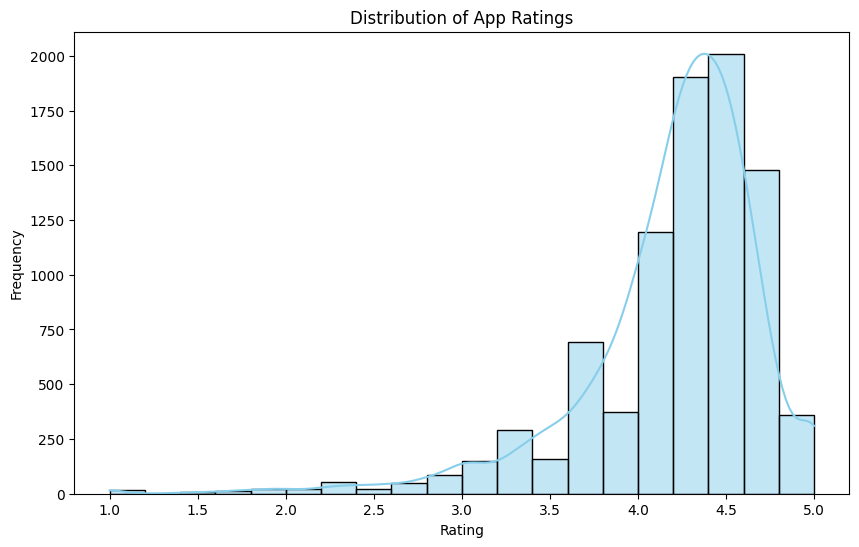

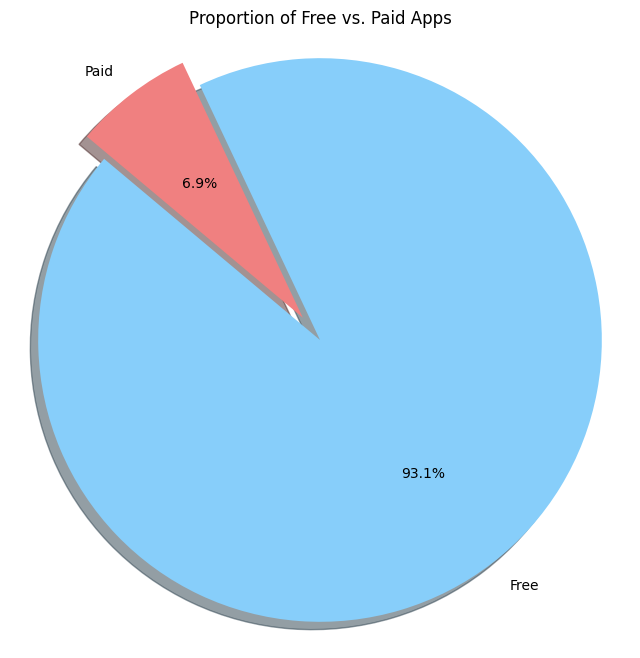

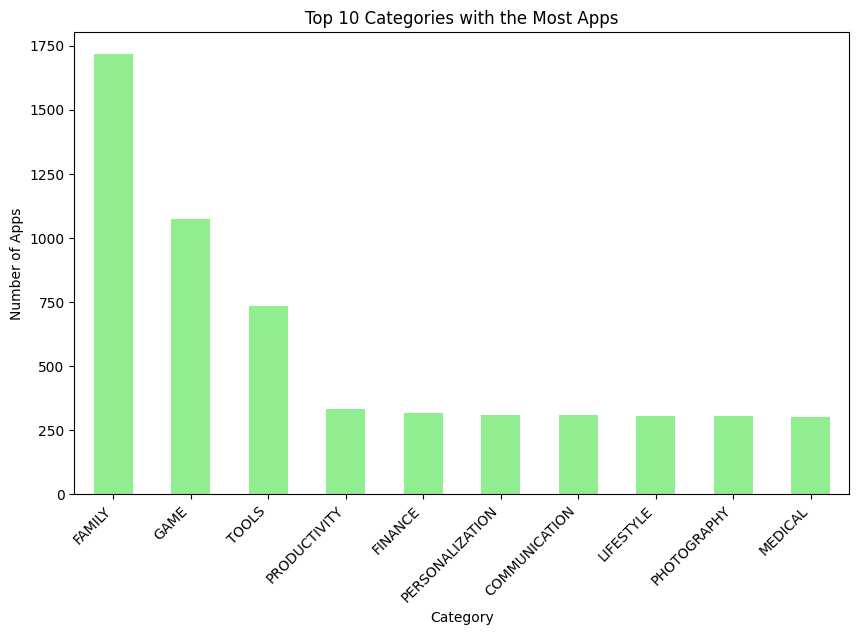

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Proportion of free vs. paid apps
free_apps_count = data[data['Type'] == 'Free'].shape[0]
paid_apps_count = data[data['Type'] == 'Paid'].shape[0]
labels = ['Free', 'Paid']
sizes = [free_apps_count, paid_apps_count]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Free vs. Paid Apps')
plt.axis('equal')
plt.show()

# Categories with the most apps
top_categories = data['Category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categories with the Most Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.show()

#3. Category Analysis

Category with the highest average rating: EVENTS
Category with the most reviews: GAME
Category with the most apps: FAMILY


<ipython-input-22-9f5754a4372f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Size', data=data, palette='Set2')


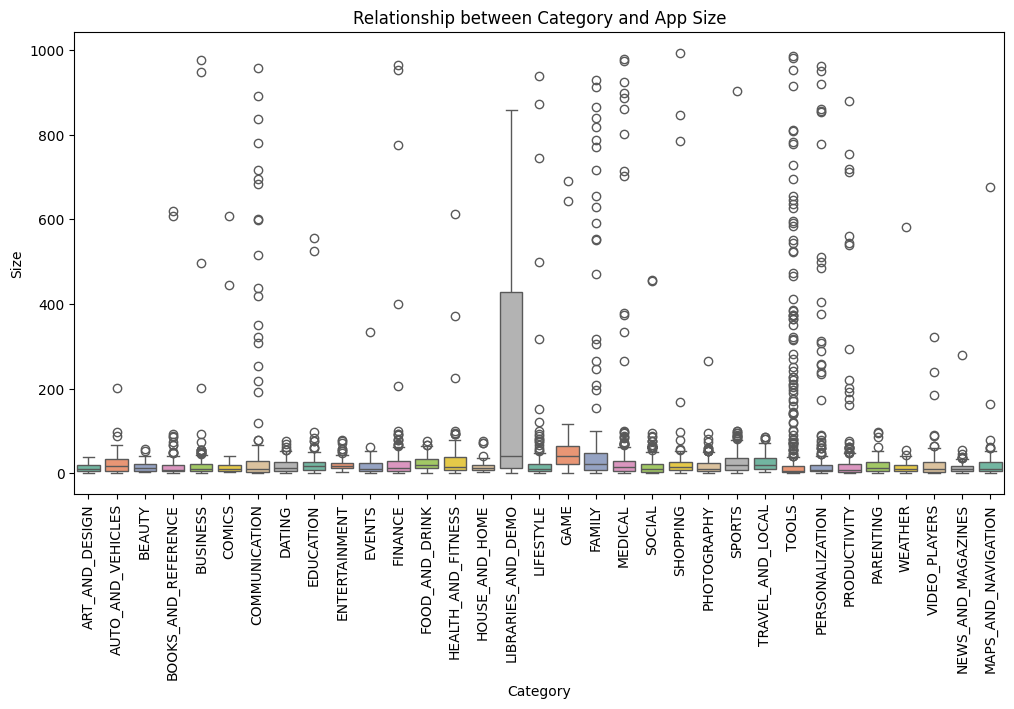

<ipython-input-22-9f5754a4372f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=data, palette='Set1')


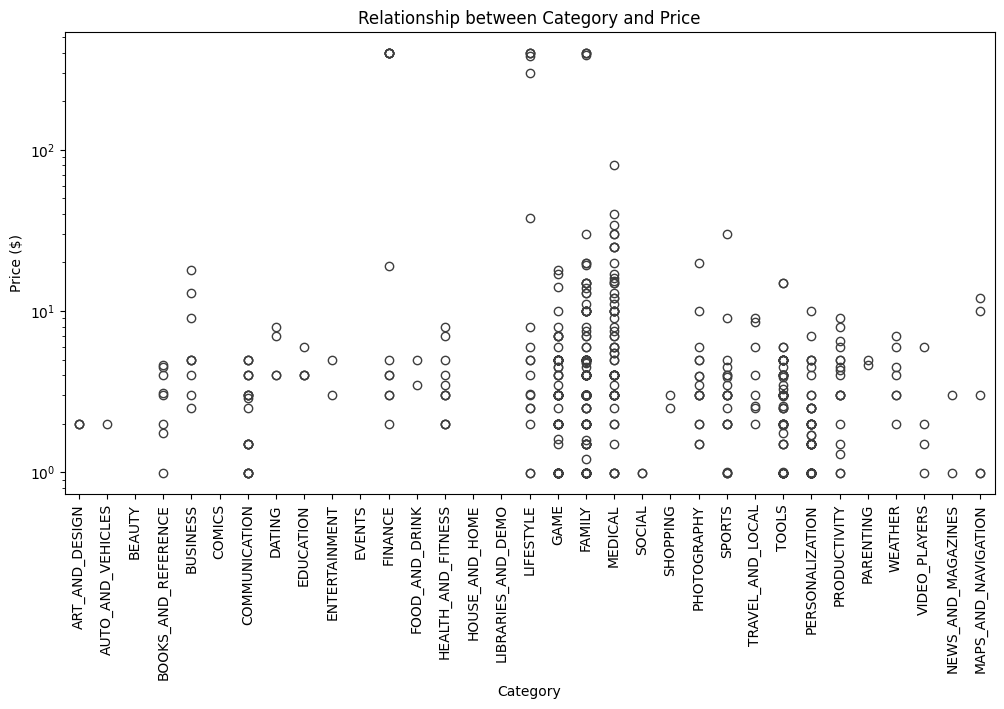

In [ ]:
# Highest average rating by category
avg_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Category with the highest average rating:", avg_rating_by_category.idxmax())

# Most reviews by category
most_reviews_by_category = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print("Category with the most reviews:", most_reviews_by_category.idxmax())

# Most apps by category
most_apps_by_category = data['Category'].value_counts()
print("Category with the most apps:", most_apps_by_category.idxmax())

# Relationship between category and app size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size', data=data, palette='Set2')
plt.title('Relationship between Category and App Size')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

# Relationship between category and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=data, palette='Set1')
plt.title('Relationship between Category and Price')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.show()

#4. Rating Prediction Model


In [ ]:
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Content Rating'] = label_encoder.fit_transform(data['Content Rating'])

X = data[['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']]
y = data['Rating']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.27214174494132876
R^2 Score: 0.011581844319266899


#5. Trend Analysis


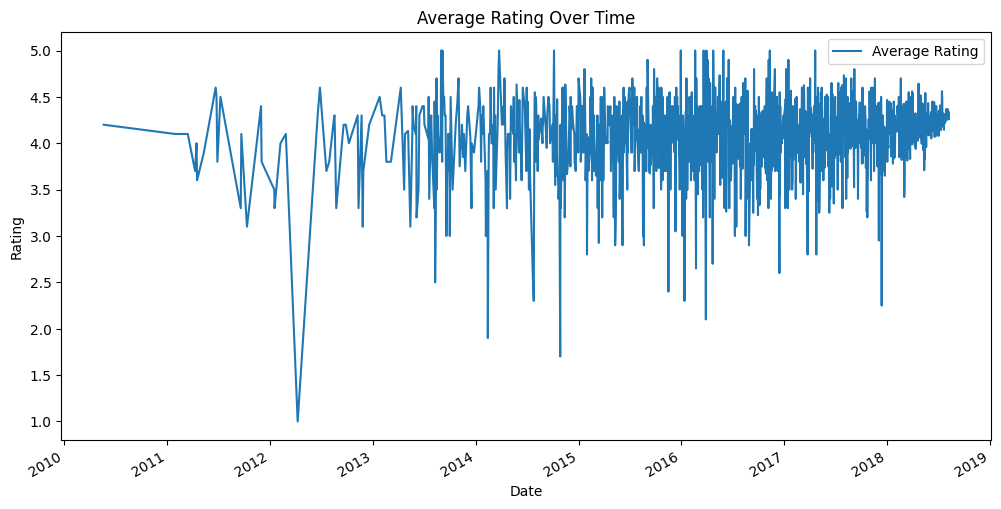

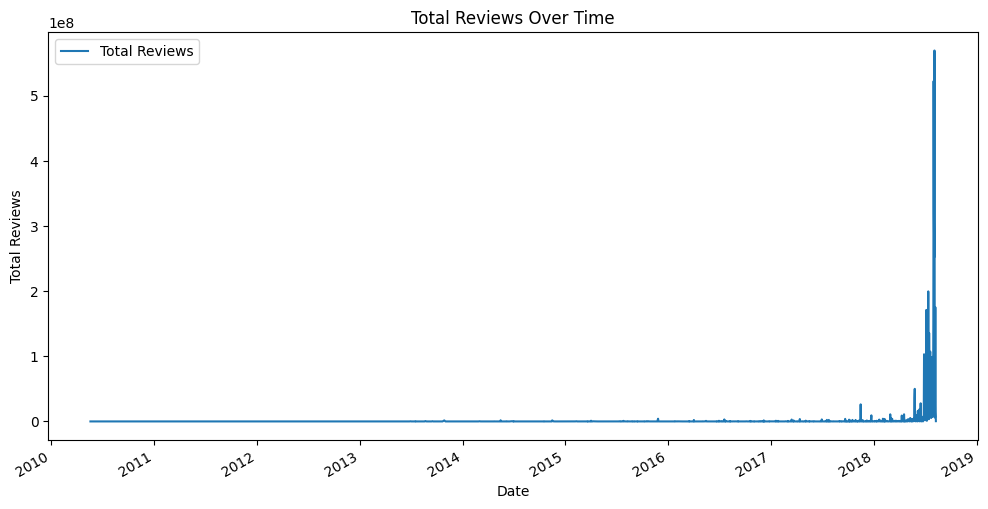

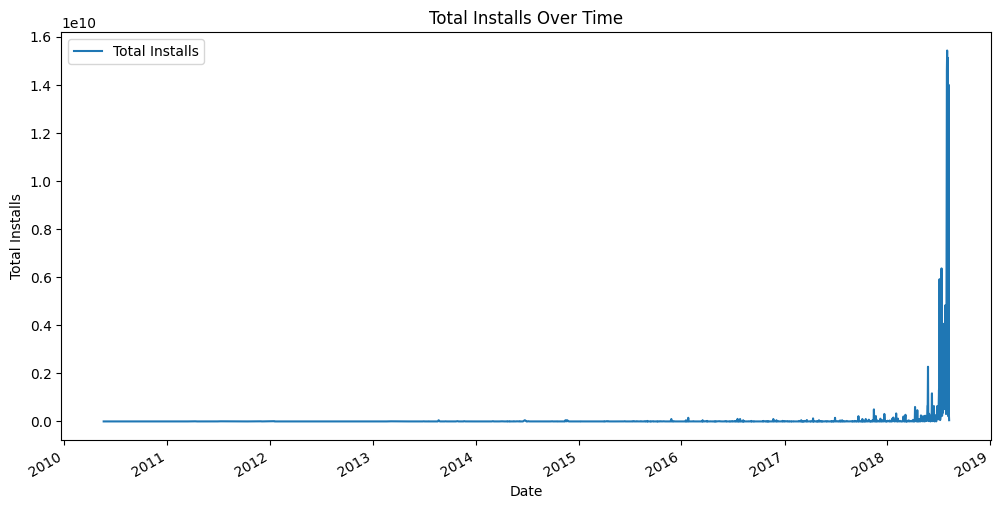

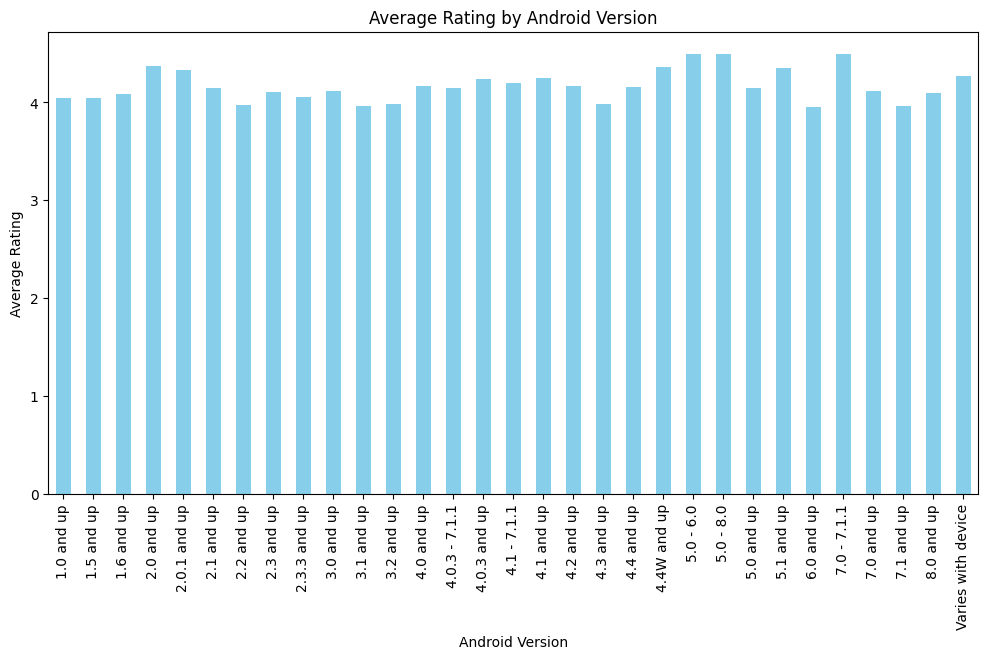

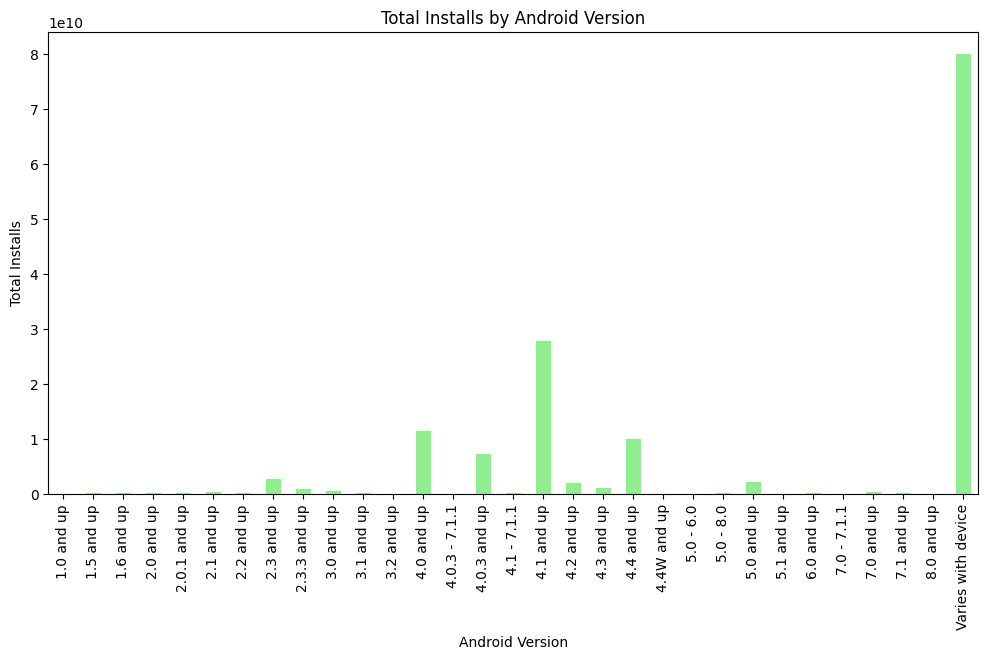

In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

# Time series analysis
plt.figure(figsize=(12, 6))
data.groupby('Last Updated')['Rating'].mean().plot(label='Average Rating')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
data.groupby('Last Updated')['Reviews'].sum().plot(label='Total Reviews')
plt.title('Total Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Total Reviews')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
data.groupby('Last Updated')['Installs'].sum().plot(label='Total Installs')
plt.title('Total Installs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Installs')
plt.legend()
plt.show()

# Impact of Android versions
android_version_rating = data.groupby('Android Ver')['Rating'].mean()
android_version_installs = data.groupby('Android Ver')['Installs'].sum()

plt.figure(figsize=(12, 6))
android_version_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Android Version')
plt.xlabel('Android Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
android_version_installs.plot(kind='bar', color='lightgreen')
plt.title('Total Installs by Android Version')
plt.xlabel('Android Version')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()

#6. Impact of Reviews on Ratings


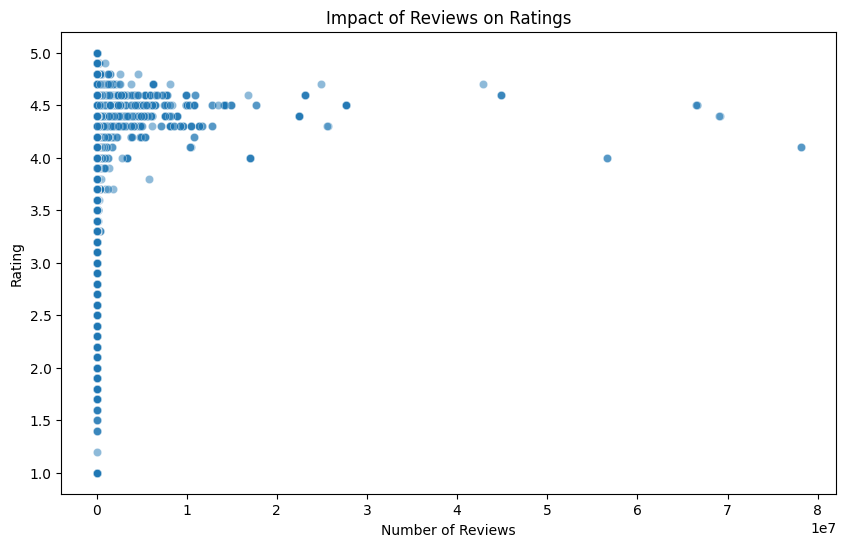

Correlation Coefficient between Reviews and Rating: 0.06872388127364139


In [ ]:
data = data.dropna(subset=['Rating', 'Reviews'])

# Plot a scatter plot to visualize the relationship between 'Reviews' and 'Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data, alpha=0.5)
plt.title('Impact of Reviews on Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

# Calculate the correlation coefficient between 'Reviews' and 'Rating'
correlation_coefficient = data['Reviews'].corr(data['Rating'])
print("Correlation Coefficient between Reviews and Rating:", correlation_coefficient)